Плотность двумерного нормального распределения имеет вид:
$$
f_{\xi,\eta'} = C\cdot \mathrm{exp}(-0.5(5x^2-4xy+8y^2+6x+12y+9))
$$

# Задание 1
- Для начала вычислим коэффициент $C$ из условия: 
$$
\int_{\mathbb{R}^2}{f_{\xi,\eta}(x,y)dS = 1}
$$

In [7]:
% начальная инициализация. Задание уравнения плотности
pkg load symbolic;
clear all;
format long;
graphics_toolkit('gnuplot');

syms x y C;
f_xi_eta  = C*exp(-0.5*(5*x^2 - 4*x*y + 8*y^2 + 6*x + 12*y + 9));









Symbolic pkg v3.2.1: Python communication link active, SymPy v1.13.3.

    double_to_sym_heuristic at line 50 column 7
    sym at line 384 column 13
    mtimes at line 54 column 5



In [8]:
% выражение через интеграл
eq1 = int(int(f_xi_eta, x, -inf, +inf), y, -inf, +inf) == 1;
C_founded = simplify(solve(eq1, C));
printf("Найденное значение для C: ");
disp(C_founded);
f_xi_eta = subs(f_xi_eta, C, C_founded);





Найденное значение для C: 
  3
  ─
  π



- Теперь вычислим выражения для плотностей случайных величин $f_\xi(x)$ и $f_\eta(x)$

In [9]:
f_xi = simplify(int(f_xi_eta, y, -inf, +inf));
printf("f_xi(x): \n");
disp(f_xi);
f_eta = simplify( subs(int(f_xi_eta, x, -inf, +inf), y, x) );
printf("f_eta(x):\n");
disp(f_eta);



f_xi(x): 

          2          
       9⋅x    9⋅x   9
     - ──── - ─── - ─
        4      2    4
  3⋅ℯ                
  ───────────────────
         2⋅√π        


f_eta(x):

               2            
           18⋅x    36⋅x   18
         - ───── - ──── - ──
             5      5     5 
  3⋅√10⋅ℯ                   
  ──────────────────────────
             5⋅√π           


- Плотности вычислены. Теперь посчитаем математические ожидания

In [10]:
expect_xi = double(int(x*f_xi, x, -inf, +inf));
expect_eta = double(int(x*f_eta, x, -inf, +inf));
exp_vec = [expect_xi expect_eta];
printf("Вектор математических ожиданий:\n");
disp(exp_vec);





Вектор математических ожиданий:

  -1  -1


- График плотности

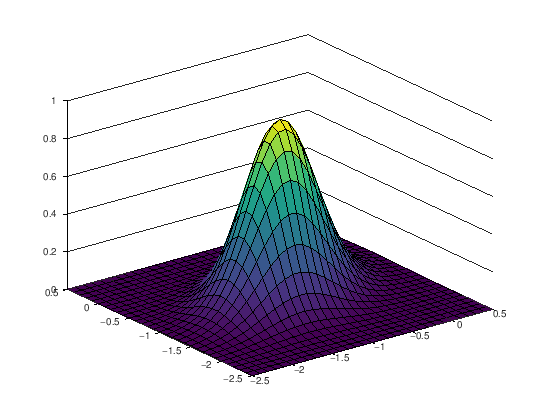

In [11]:
[x_grid y_grid] = meshgrid(-2.5:0.1:0.5, -2.5:0.1:0.5);
f_xi_eta_numerical = matlabFunction(f_xi_eta);
surf(x_grid, y_grid, f_xi_eta_numerical(x_grid, y_grid));

- Вычислим ковариацию, используя следующую формулу:
  $$
  \mathrm{cov}(\xi, \eta) = 
  \int_{\mathbb{R}^2}{(x - \mathbb{E}\xi)(y - \mathbb{E}\eta)f_{\xi, \eta}(x,y)dS}
  $$

In [16]:
func_to_integrate = (x + 1)*(y + 1)*f_xi_eta;
covariance = simplify( int(int(func_to_integrate, x, -inf, +inf), y, -inf, +inf) );
printf("Ковариация: \n");
disp(covariance);




Ковариация: 

  1/18
